In [1]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train.shape, type(X_train), y_train.shape, type(y_train)

X = X_train[:1000].reshape(-1, 784)  
y = y_train[:1000]

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
X.shape, y.shape

((1000, 784), (1000,))

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names[9]

'Ankle boot'

In [5]:
cnt = 0

for i in class_names:
  print(cnt,"번 인덱스 이름 : ",i)
  cnt += 1


0 번 인덱스 이름 :  T-shirt/top
1 번 인덱스 이름 :  Trouser
2 번 인덱스 이름 :  Pullover
3 번 인덱스 이름 :  Dress
4 번 인덱스 이름 :  Coat
5 번 인덱스 이름 :  Sandal
6 번 인덱스 이름 :  Shirt
7 번 인덱스 이름 :  Sneaker
8 번 인덱스 이름 :  Bag
9 번 인덱스 이름 :  Ankle boot


Text(0.5, 1.0, 'Ankle boot')

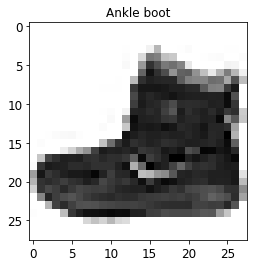

In [6]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

#data가 섞여서 들어가있다. 0번째에는 class_names 9번째의 ankle boot가 있다.
idx = 0
some_digit = X[idx]
some_digit_image = some_digit.reshape(28,28)
some_digit_label = y[idx]
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.title(class_names[some_digit_label])

In [7]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")
    
  # 숫자 그림을 위한 추가 함수
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

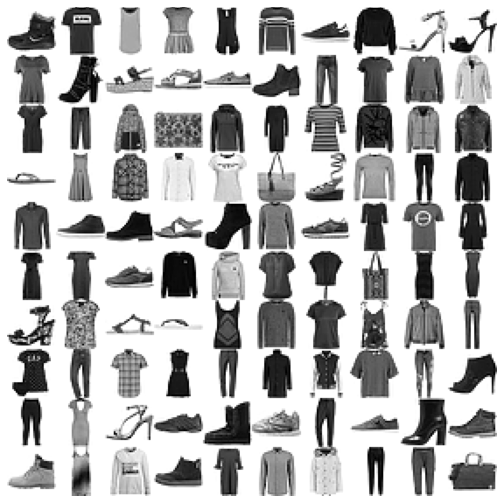

In [8]:
plt.figure(figsize=(9,9))
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
plt.show()

Text(0.5, 1.0, 'Ankle boot')

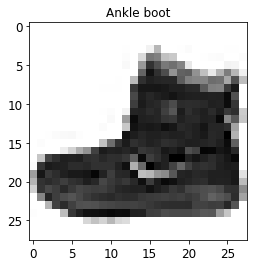

In [9]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)
some_digit_label = y[idx]
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.title(class_names[some_digit_label])


# SVM

In [11]:

X = X_train[:1000].reshape(-1, 784)  
y = y_train[:1000]

X_test = X_test[:1000].reshape(-1, 784) 
y_test = y_test[:1000]

from sklearn.svm import SVC#분류
from sklearn.svm import SVR#회귀
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

In [12]:
# SVM 시작
# SVR로도 풀어봤는데 결과 안좋음
# 선형(LinearSVC)  <--> 회귀(SVR)
# 분류:확률로 나온다. <-->  회귀 = 연속된 값을 예측하는 것
# SVC(분류) => 마진 않에 적은 샘플을 포함하는 것이 목적

def pipe_nomal(kernel_name):
  if kernel_name == "default":#default 면실행
    model = Pipeline([
        # ("svm_clf", SVC(degree=3, coef0=1, C=5, gamma=3))#결과 안좋음 -> gamma와 c 조정하면 결과 달라짐 ,degree 조절해도 결과 안변함
        ("svm_clf", SVC(degree=3, coef0=1 ,C=10, gamma='scale'))# 모델 만들때 커널 설정 -> 자동으로 다차항으로 바꿔서 분류
    ])
  elif kernel_name == "rbf_scaler":#StanderdScaler 적용시킬 rbf일경우 실행
    model = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", degree=3, coef0=1 ,C=10, gamma='scale'))
    ])
  else:#linear, poly, sigmoid 일 경우 실행
    model = Pipeline([
        ("svm_clf", SVC(kernel=kernel_name, degree=3, coef0=1 ,C=10, gamma='scale'))
    ])

  model.fit(X, y)
  cross_nomal = cross_val_score(model,X,y,cv=3,scoring="accuracy")
  print(kernel_name,"에 교차검증 적용: ", cross_nomal)
  model_accuracy = model.score(X_test,y_test)
  print( "test_model_accuracy : ", model_accuracy)
  cross_nomal_mean = cross_nomal.mean()

  return cross_nomal_mean

########################함수선언끝#########################################


default_accuracy_mean = pipe_nomal("default")#kernel이 rbf로 설정됨
print("kernel=default: ",default_accuracy_mean)
print("###########################################################")
print()

linear_accuracy_mean = pipe_nomal("linear")
print("kernel=linear: ",linear_accuracy_mean)
print("###########################################################")
print()

poly_accuracy_mean = pipe_nomal("poly")
print("kernel=poly: ",poly_accuracy_mean)
print("###########################################################")
print()

rbf_accuracy_mean = pipe_nomal("rbf")
print("kernel=rbf: ",rbf_accuracy_mean)
print("###########################################################")
print()

sigmoid_accuracy_mean = pipe_nomal("sigmoid")
print("kernel=sigmoid: ",sigmoid_accuracy_mean)
print("###########################################################")
print()

rbf_scaler_accuracy_mean = pipe_nomal("rbf_scaler")
print("StandardScaler 적용 후 kernel=rbf_scaler: ",rbf_scaler_accuracy_mean)
print("###########################################################")
print()

default 에 교차검증 적용:  [0.82335329 0.84084084 0.83483483]
test_model_accuracy :  0.831
kernel=default:  0.8330096563629498
###########################################################

linear 에 교차검증 적용:  [0.79341317 0.8018018  0.8018018 ]
test_model_accuracy :  0.785
kernel=linear:  0.7990055924187661
###########################################################

poly 에 교차검증 적용:  [0.80538922 0.83183183 0.81981982]
test_model_accuracy :  0.798
kernel=poly:  0.819013624402846
###########################################################

rbf 에 교차검증 적용:  [0.82335329 0.84084084 0.83483483]
test_model_accuracy :  0.831
kernel=rbf:  0.8330096563629498
###########################################################

sigmoid 에 교차검증 적용:  [0.4011976  0.37237237 0.31231231]
test_model_accuracy :  0.36
kernel=sigmoid:  0.36196076315836795
###########################################################

rbf_scaler 에 교차검증 적용:  [0.80538922 0.8018018  0.81381381]
test_model_accuracy :  0.813
StandardScaler 적용 후 kerne

In [13]:
# SVM 성능 올리기 
# 성능이 가장 좋은 rbf kernel로 모델만들어서 성능 올리기
# SVM은 특성 스케일에 영향 많이 받기 때문에 standardScaler 이용해서 정규화 한 후 SVM 사용한다.
# standard scaler -> 스케일링 한 경우 -> x0와 x1의 값들이 일정해지면서 샘플들이 재대로 구분된다.
# 커널 트릭 = 실제 다항 특징을 추가하지 않고 비슷한 효과를 만드는 수학적 트리
# 커널에 1.Linear 주면 직선, 2.poly는 곡선, 3.sigmoid, 4.가우시안 커널(RBF)->디폴트값
# RBF를 가장 많이 사용함
# kernel="RBF"를 주고, degree(다차항 차수)-> 막 늘리면 안됨(기하급수적으로 그래프가 바뀌기 때문에), c = 규제(복잡도 조절)
# 간마가 커진다 -> 분산 작아진다 -> 복잡도 증가(증가할수록 다차항이됨)
# C가 커진다 -> 규제 작아진다 -> 복잡도 증가.
# 간마는 크게, C는 작게하는것이 좋음 -> 간마커지면 일반화 안좋아짐 
# 따라서 간마와 c를 적절히 조절해 사용하면 분류를 더 잘 할수 있게된다.

model1 = Pipeline([
        ("svm_clf", SVC(kernel="rbf",degree=3, coef0=1 ,C=10, gamma='scale')) 
    ])
model1.fit(X,y)
print("중축모델 : ",model1.score(X_test,y_test))


model2 = Pipeline([
        ("svm_clf", SVC(kernel="rbf",degree=3, coef0=1 ,C=10000, gamma='scale'))
    ])
model2.fit(X,y)
print("C=10000으로 한 모델(복잡도 증가) : ",model2.score(X_test,y_test))


model3 = Pipeline([
        ("svm_clf", SVC(kernel="rbf",degree=100, coef0=1 ,C=10, gamma='scale'))  
    ])
model3.fit(X,y)
print("dgree=100으로 한 모델(복잡도 증가) : ",model3.score(X_test,y_test))

model4 = Pipeline([
        ("svm_clf", SVC(kernel="rbf",degree=3, coef0=1 ,C=10, gamma=0.01))
    ])
model4.fit(X,y)
print("간마=0.01 로 한 모델(분산 커짐) : ",model4.score(X_test,y_test))

중축모델 :  0.831
C=10000으로 한 모델(복잡도 증가) :  0.824
dgree=100으로 한 모델(복잡도 증가) :  0.831
간마=0.01 로 한 모델(분산 커짐) :  0.095


# 결정트리

In [14]:
# 결정트리 시작
# 분류로 풀어봤는데 결과 안좋아서 회귀로 바꿈

# 회귀는 연속된 값, 분류는 이진분류 또는 다항분류,
# 회귀는 "평균과 실제값의 오차"(MSE)를 줄이는것을 목표로 한다. -> 분류는 불순도 줄이는걸 목표로 함

from sklearn.tree import DecisionTreeRegressor#회귀
# from sklearn.tree import DecisionTreeClassifier#분류
from sklearn.tree import export_graphviz# 결정함수 그리는 함수
from graphviz import Source

In [15]:
# 자식노드가 없는 노드 = leaf_node
# max_leaf_nodes = 리프 노드의 최대 수 -> 더 세부적으로 특징이 셋팅되도록 함 -> 과적합 일어남 
# max_leaf_nodes=1000 은 안쓴거와 똑같음

def learning(n):
  tree_reg = DecisionTreeRegressor(random_state=42,max_leaf_nodes=n)
  tree_reg.fit(X, y)
  train_accuracy = 0
  test_accuracy = 0
  train_accuracy = tree_reg.score(X,y)
  test_accuracy = tree_reg.score(X_test,y_test)
  a = (train_accuracy-test_accuracy)#정확도 차이
  print("max_leaf_nodes=",n, ", 학습데이터정확도=",train_accuracy,", 시험데이터정확도=",test_accuracy,". 차이=",a)


leaf_nodes_10 = learning(10)
leaf_nodes_100 = learning(100)
leaf_nodes_1000 = learning(1000)


max_leaf_nodes= 10 , 학습데이터정확도= 0.7848451625865887 , 시험데이터정확도= 0.6874649498014843 . 차이= 0.09738021278510434
max_leaf_nodes= 100 , 학습데이터정확도= 0.9930648639442261 , 시험데이터정확도= 0.6116655813174816 . 차이= 0.3813992826267445
max_leaf_nodes= 1000 , 학습데이터정확도= 1.0 , 시험데이터정확도= 0.600469686436881 . 차이= 0.39953031356311897


In [16]:
# 과적합이 된다는건 그만큼 많은 특징으로 분류가 된다는 것이다. -> 데이터 갯수만큼인 1000개로 설정 -> 더 많은 데이터가 있다면 성능 더 좋아질 것임 
# min_samples_split = 분할되기 위해 노드가 가져야하는 최소 샘플수
# 데이터셋이 더 컸다면 규제를 통해 성능을 높일 수 있었을 것이다. 

def learning(n):
  tree_reg = DecisionTreeRegressor(random_state=42,max_leaf_nodes=1000,min_samples_split=n)
  tree_reg.fit(X, y)
  train_accuracy = 0
  test_accuracy = 0
  train_accuracy = tree_reg.score(X,y)
  test_accuracy = tree_reg.score(X_test,y_test)
  a = (train_accuracy-test_accuracy)#정확도 차이
  print("min_samples_split=",n, ", 학습데이터정확도=",train_accuracy,", 시험데이터정확도=",test_accuracy,". 차이=",a)

samples_split_10 = learning(10)
samples_split_126 = learning(100)
samples_split_1000 = learning(1000)#데이터 1000개밖에 없기 때문에 
print("#############최적##############")
samples_split_126 = learning(126)


min_samples_split= 10 , 학습데이터정확도= 0.9871747287870107 , 시험데이터정확도= 0.6164916586000239 . 차이= 0.3706830701869869
min_samples_split= 100 , 학습데이터정확도= 0.8353583595234649 , 시험데이터정확도= 0.7131313863706805 . 차이= 0.12222697315278441
min_samples_split= 1000 , 학습데이터정확도= 0.5068109906313804 , 시험데이터정확도= 0.516961645228159 . 차이= -0.010150654596778663
#############최적##############
min_samples_split= 126 , 학습데이터정확도= 0.8125931093727936 , 시험데이터정확도= 0.7140761639242653 . 차이= 0.09851694544852829


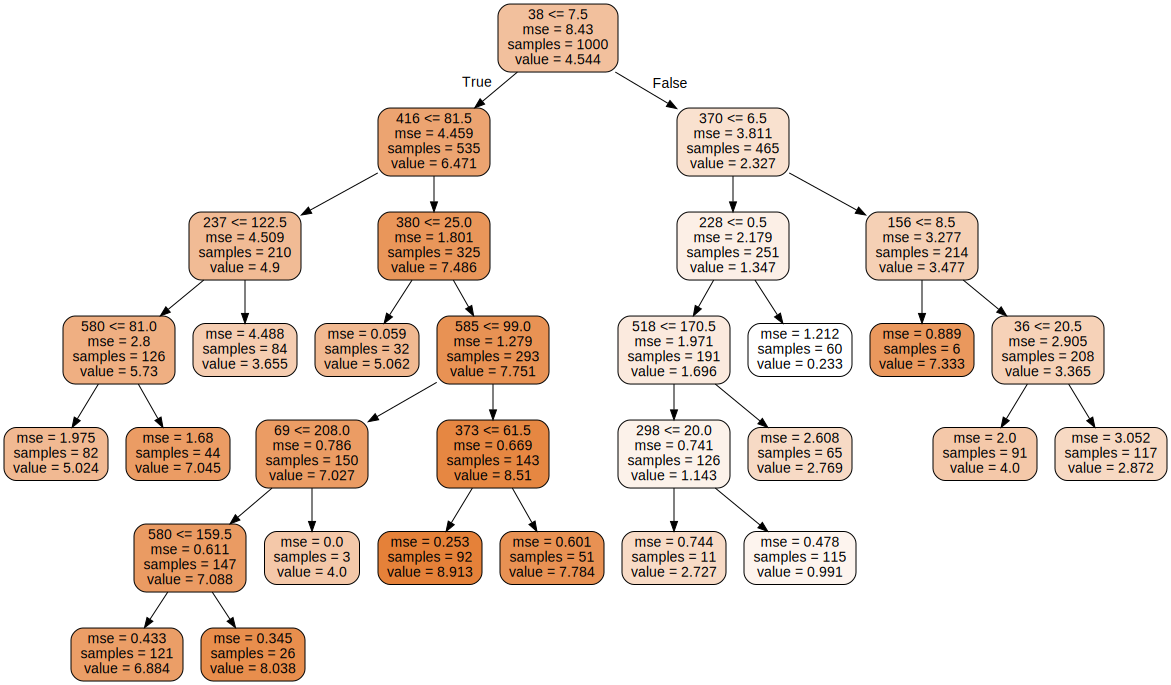

In [17]:
# fashion_mnist의 특징은 사진 하나당 28*28 로 784개의 특징이 존재한다. 
# 28*28 이라 784개의 특징이름을 만들어줌


tree_reg = DecisionTreeRegressor(random_state=42,max_leaf_nodes=1000,min_samples_split=126)
tree_reg.fit(X, y)

a = []
for i in range(784):
  a.append(i)

export_graphviz(
        tree_reg,
        out_file=os.path.join(IMAGES_PATH, "classifi_tree.dot"),
        feature_names=a,
        rounded=True,
        filled=True
    )
Source.from_file(os.path.join(IMAGES_PATH, "classifi_tree.dot"))
# Source.from_file(os.path.join(IMAGES_PATH, "regression_tree.dot"))

# 랜덤 포레스트


In [18]:
# 세가지 분류기로 다수결 분류기 만들기.  
# 앙상블,랜덤 포레스트 : 앞에서 배운것들처럼 학습 모델이 아닌, 학습모델을 어떻게 조합하면 성능이 좋아지는지를 알아보는 조합 방법이다.
# 앙상블 : 여러개의 모델을 합한것 -> 여러 모델을 합하면 성능이 좋아짐
# 랜덤 포레스트 : 결정트리의 앙상블로,성능이 아주 뛰어나다. -> 결정트리 모델 여러개를 합한모델임
# 앙상블 방법 -> 다양한 분류기를 학습, 각 분류기 예측 결과를 혼합해서 최종 예측 결과를 결정 -> 따라서 여러 분류기의 예측을 종합해 판단한다. 

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [19]:
# 앙상블과 랜덤포레스트 구조를 설명하기 위해 수업 내용 이용

# 분류기 모으는 방법 ->
# voting='hard'->클래스(어떤결과나왓는지)이용    vs     voting='soft'->확률이용
# 앞에서 사용한 모델들을 이용해서 앙상블 만들기 
# 원래는 soft가 더 확률 잘 나오는데 여기서는 hard가 결과가 더 잘나오는 것을 볼 수 있다. 

# RandomForest가 voting 보다 결과가 잘 나오는 이유는 RandomForest자체로 앙상블이기도 하고, 
# voting은 낮은 성능을 내는 결정트리와 SVC도 합하여 만든 모델이기 때문이다.


model_Decision = DecisionTreeClassifier(random_state=42)
model_Randomf = RandomForestClassifier(random_state=42)
model_SVC = SVC(probability=True,random_state=42)# SVC는 probability=True로 해야 predict_proba()사용할 수 있음

modee_voting_hard = VotingClassifier(
    estimators=[('dc', model_Decision), ('rf', model_Randomf), ('svc', model_SVC)],
    voting='hard')#클래스 결과만 이용

modee_voting_soft = VotingClassifier(
    estimators=[('dc', model_Decision), ('rf', model_Randomf), ('svc', model_SVC)],
    voting='soft')# 클래스 확률 이용 -> 이게 더 성능 좋다. 

def learning(model,model_name):
  model.fit(X,y)
  y_pred = model.predict(X_test)
  print(model_name,accuracy_score(y_test, y_pred))

learning(model_Decision,"Decision")
learning(model_Randomf,"RandomForest")
learning(model_SVC,"SVC")
learning(modee_voting_hard,"Voting_hard")
learning(modee_voting_soft,"Voting_soft")



Decision 0.678
RandomForest 0.805
SVC 0.786
Voting_hard 0.801
Voting_soft 0.741


In [20]:
# 랜덤포레스트로 성능 높이기 
# n_estimators :500 -> 500개의 분류기 만들것이다. 
# max_samples :100 -> 무작위로 선택할 샘플 갯수
# bootstrap=true -> 중복허용 -> 배깅
# 랜덤포레스트 = DecisionTreeClassifier + BaggingClassifier -> 결정트리의 앙상블
# 장점: 특징의 중요도를 알 수 있다. -> 
# 특징으로 분할할 때 지니 불순도를 계산하는데, 그때 그 특징이 불순도를 얼마나 낮추는지를 계산할 수 있다.
# 불순도 많이 낮추는 특징부터 사용


def learning(n):#,min_samples_split=n,max_features=10,max_depth=100 -> 다른 규제 해봤는데 성능 차이 없었음
  model_RandomF = RandomForestClassifier(random_state=42,max_leaf_nodes=n)
  model_RandomF.fit(X, y)
  train_accuracy = 0
  test_accuracy = 0
  train_accuracy = model_RandomF.score(X,y)
  test_accuracy = model_RandomF.score(X_test,y_test)
  a = (train_accuracy-test_accuracy)#정확도 차이
  print("min_samples_split=",n, ", 학습데이터정확도=",train_accuracy,", 시험데이터정확도=",test_accuracy,". 차이=",a)

learning(10)
learning(100)
learning(1000)

min_samples_split= 10 , 학습데이터정확도= 0.771 , 시험데이터정확도= 0.729 . 차이= 0.04200000000000004
min_samples_split= 100 , 학습데이터정확도= 0.999 , 시험데이터정확도= 0.804 . 차이= 0.19499999999999995
min_samples_split= 1000 , 학습데이터정확도= 1.0 , 시험데이터정확도= 0.804 . 차이= 0.19599999999999995


In [24]:
# 성능 높이기 
# oob 사용이유 = 샘플을 무작위로 뽑아서 학습시키기때문에 사용되지 않은 샘플이 있을 수 있다.
# 검증셋(validation set)을 만들 필요가 없음 -> 검증셋의 간단한 버전이 교차검증임
# 사용되지 않은 샘플로 test set 결과 보기전에 간단하게 모델을 평가 할 수있다. -> 편리함
# oob_score=True 주고, 모델.oob_scpre_ 해주면 validation set의 정확도를 알 수 있디.


def learning():

  # model_RandomF = RandomForestClassifier(n_estimators = 1000, random_state=42, max_leaf_nodes=1000,
  #                                        min_samples_split=61, max_features=100, max_depth=10)#estimator =1000 ->75.9%

  # model_RandomF = RandomForestClassifier(n_estimators = 500, random_state=42, max_leaf_nodes=1000,
  #                                        min_samples_split=61, max_features=100, max_depth=10)#sample_split갯수 늘림 ->75%
  

  # model_RandomF = RandomForestClassifier(n_estimators = 500, random_state=42, max_leaf_nodes=1000,
  #                                        min_samples_split=2, max_features=700, max_depth=10)#특징갯수 늘리니까 시간 오래걸림-> 78%


  # model_RandomF = RandomForestClassifier(n_estimators = 500, random_state=42, max_leaf_nodes=1000,
  #                                        min_samples_split=2, max_features=100, max_depth=10)#특징개수 100개 -> 80.5%
  
  # model_RandomF = RandomForestClassifier(n_estimators = 500, random_state=42, max_leaf_nodes=1000,
  #                                        min_samples_split=2, max_features=10, max_depth=10)#depth=10 -> 80.6%

    # model_RandomF = RandomForestClassifier(n_estimators = 500,random_state=42,max_leaf_nodes=1000,
  #                                        min_samples_split=2,max_features=10,max_depth=100)#81%

  # model_RandomF = RandomForestClassifier(n_estimators = 500, random_state=42, max_leaf_nodes=1000)# 81.2%

  # model_RandomF = RandomForestClassifier(n_estimators = 1000, random_state=42)# 81.3%
  
  # model_RandomF = RandomForestClassifier(n_estimators = 3000, random_state=42)# 81.3%

  # model_RandomF = RandomForestClassifier(n_estimators = 2000, random_state=42)# 81.4%

  model_RandomF = RandomForestClassifier(n_estimators=2000, oob_score=True, random_state=42)

  model_RandomF.fit(X, y)
  train_accuracy = 0
  test_accuracy = 0
  train_accuracy = model_RandomF.score(X,y)
  test_accuracy = model_RandomF.score(X_test,y_test)
  a = (train_accuracy-test_accuracy)#정확도 차이
  print('RandomForest oob_score_ :',model_RandomF.oob_score_, ", train 데이터정확도=",train_accuracy,", test 데이터정확도=",test_accuracy,". 차이=",a)

learning()


RandomForest oob_score_ : 0.831 , train 데이터정확도= 1.0 , test 데이터정확도= 0.814 . 차이= 0.18600000000000005


[Text(1, 0, 'Not important'), Text(1, 0, 'Very important')]

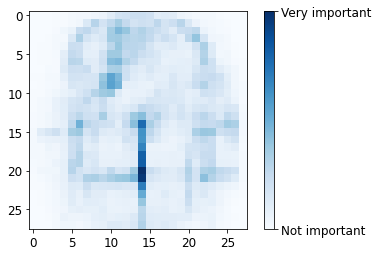

In [26]:
# 수업 내용 이용해서 RandomForest model 중요 특징을 시각화 

# 20*14 정도의 특징이 가장 중요하다는 것을 알 수 있다. 

import matplotlib as mpl

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.Blues, interpolation="nearest")
    plt.axis("on")

model_RandomF = RandomForestClassifier(n_estimators=2000, oob_score=True, random_state=42)
model_RandomF.fit(X,y)

plot_digit(model_RandomF.feature_importances_)# 중요도를 출력

cbar = plt.colorbar(ticks=[model_RandomF.feature_importances_.min(), model_RandomF.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])
  

In [29]:
# 데이터셋은 정확도만으로 평가하기 어렵기 때문에 오차행렬을 사용해야 한다.
# 오차행렬이란, 분류 모델의 성능을 평가하기 위해 사용하는 것으로, 모델의 예측이 얼마나 맞고 틀렸는지 구분시켜줌
# 오차행렬 보는 방법 = 대각선을 기준으로 보면된다 -> 대각선 = 맞춘갯수

# 정확도 만으론 판단하기 어렵기 때문에 정밀도와 재현율을 봐야함
# 임계치 낮춤 -> 재현율 높임(더 많이 검출되므로, 진짜가 많이 들어감) , 정밀도(검출된 것 중에서 진짜인것)는 낮아질 가능성이 높음
# 재현율 = 더 많이 포함시켜 확률 내는것 -> 재현율이 높아지면 정밀도 낮아짐 
# 정밀도 = 검출된 것 중에서 진짜인 것  -> 정밀도 높아지면 재현율 낮아짐

# 오차행렬로 어디서 오류가 가장 많이 발생하는지 알 수 있다.
# 0과 6 을 가장 많이 햇갈려 함

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

def confu_matrix(X,Y,high_fit):
  scaler = StandardScaler()
  model_RandomF_scaler = scaler.fit_transform(X.astype(np.float64))#forest를 Scaler해줌
  y_pred = cross_val_predict(model_RandomF, model_RandomF_scaler, y, cv=3)#예측한 값을 저장
  cm = confusion_matrix(y, y_pred)#오차행렬로 표시 

  return cm

cm = confu_matrix(X,y,model_RandomF)#오차행렬을 리턴받음
print(cm)#오차행렬 표시

[[ 92   0   2   7   0   0   4   0   2   0]
 [  0  94   2   6   0   1   1   0   0   0]
 [  0   0  56   1  16   0  13   0   0   0]
 [  5   1   1  78   3   0   4   0   0   0]
 [  0   0  13   6  72   0   4   0   0   0]
 [  0   0   0   0   0  95   0   2   1   2]
 [ 21   1  10   1  12   1  49   0   5   0]
 [  0   0   0   0   0   3   0 106   0   6]
 [  0   0   2   2   0   2   0   1  95   0]
 [  0   0   0   0   0   1   0   5   1  92]]


T-shirt/top  와  Shirt 가 햇갈린다.


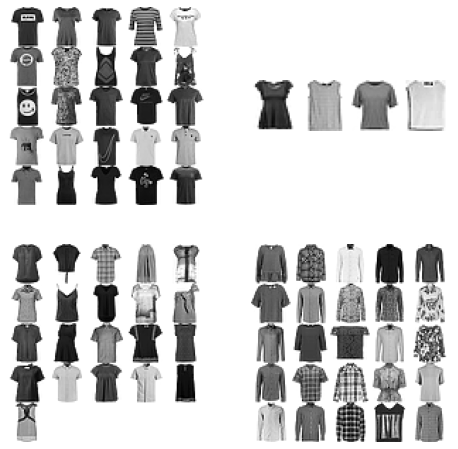

In [30]:
# Error Analysis 시작
# 에러를 분석하는 과정으로, plot한 결과중 가장많이 틀린(가장밝은) 2개의 그림을 분석한다,

# 왼쪽위 = T-shirt/top 인데 T-shirt/top 이라고 한것
# 오른쪽위 = T-shirt/top 인데 Shirt 라고 한것
# 왼쪽밑 = Shirt 인데 T-shirt/top 이라고 한것
# 오른쪽밑 = Shirt 인데 Shirt 라고 한것


def predict(X,Y,high_fit):
  scaler = StandardScaler()
  model_RandomF_scaler = scaler.fit_transform(X.astype(np.float64))#forest를 Scaler해줌
  y_pred = cross_val_predict(model_RandomF, model_RandomF_scaler, y, cv=3)#예측한 값을 저장
  return y_pred

y_pred = predict(X,y,model_RandomF)
# print(y_pred)

print(class_names[0]," 와 ", class_names[6], "가 햇갈린다.")

cl_a, cl_b = 0, 6

X_aa = X[(y == cl_a) & (y_pred == cl_a)]
X_ab = X[(y == cl_a) & (y_pred == cl_b)]
X_ba = X[(y == cl_b) & (y_pred == cl_a)]
X_bb = X[(y == cl_b) & (y_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
